In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
mean=np.array([5.0,6.0])
cov=np.array([[1.0,0.95],[0.95,1.2]])
data=np.random.multivariate_normal(mean,cov,8000)


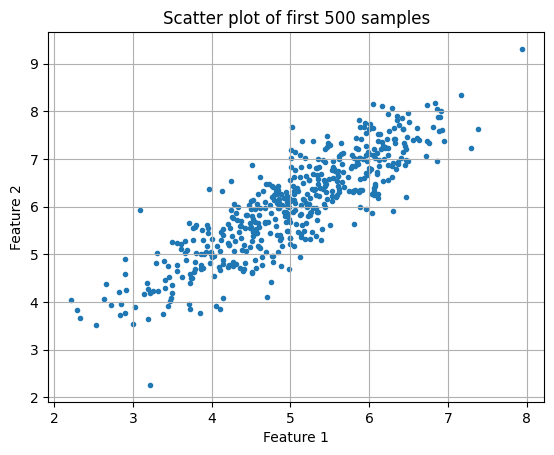

In [9]:
plt.scatter(data[:500,0],data[:500,1],marker='.')
plt.title("Scatter plot of first 500 samples")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

split the data 

In [10]:
data=np.hstack((np.ones((data.shape[0],1)),data))
split_factor=0.90
split=int(split_factor * data.shape[0])
x_train=data[:split,:-1]
y_train=data[:split,-1].reshape((-1,1))
x_test=data[split:,:-1]
y_test=data[split:,-1].reshape((-1,1))

display the datasets

In [11]:
print("Number of examples in training set = %d" % x_train.shape[0])
print("Number of examples in testing set = %d" % x_test.shape[0])

Number of examples in training set = 7200
Number of examples in testing set = 800


linear regression apply korbo 

In [12]:
def hypothesis(x,theta):
       return np.dot(x,theta)
def gradient(x,y,theta):
       h=hypothesis(x,y,theta)
       grad=np.dot(x.T,(h-y))
       return grad 
def cost(x,y,theta):
       h=hypothesis(x,theta)
       j=np.dot((h-y).T,(h-y))/2 
       return j[0]

create many branches of training 

In [13]:
def create_many_branches(x,y,batch_size):
       mini_batches=[]
       data=np.hstack((x,y))
       np.random.shuffle(data)
       n_minibatches=data.shapes[0]//batch_size
       for i in range (n_minibatches+1 ):
              mini_batch=data[i*batch_size:(i+1)*batch_size,:]
              x_mini=mini_batch[:,:-1]
              y_mini=mini_batch[:,-1].reshape((-1,1))
              mini_batches.append((x_mini,y_mini))
       if data.shape[0]% batch_size!=0: 
              mini_batch=data[i*batch_size:]
              x_mini=mini_batch[:,:-1]
              y_mini=mini_batch[:,1].reshape((-1,1))
              mini_batches.append((x_mini,y_mini))
              return mini_batches


gradient descent 

In [14]:
def gradientdescent(x,y,learning_rate=0.001,batch_size=32):
       theta=np.zeros(x.shape[1],1)
       error_list=[]
       max_iters=3
       for itr in range(max_iters):
              mini_batches=create_mini_batches(x,y,batch_size)
              for x_mini,y_mini in mini_batches:
                     theta=theta-learning_rate*gradient(x_mini,y_mini,theta)
                     error_list.append(cost(x_mini,y_mini,theta))
              return theta,error_list

In [19]:
theta, error_list = gradientdescent(x, y)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

NameError: name 'x' is not defined